In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure,output_notebook, show
from bokeh.models import ColumnDataSource, Title
from bokeh.models.tools import HoverTool

# data source
Employmentdata = pd.read_csv('employmentData.csv')
Employmentdf = pd.DataFrame(Employmentdata)

unemploymentData = pd.read_csv('unemploymentData.csv')
Unemploymentdf = pd.DataFrame(unemploymentData)

In [69]:
#change employment monthly data to yearly
Employmentdf['observation_date'] = pd.to_datetime(Employmentdf['observation_date'])
Employmentdf.set_index('observation_date', inplace=True)
Employmentdf.index = pd.to_datetime(Employmentdf.index)

EmploymentYearlydf = Employmentdf.resample('A').last()

In [70]:
#change unemployment monthly data to yearly
Unemploymentdf['observation_date'] = pd.to_datetime(Unemploymentdf['observation_date'])
Unemploymentdf.set_index('observation_date', inplace=True)
Unemploymentdf.index = pd.to_datetime(Unemploymentdf.index)

UnemploymentYearlydf = Unemploymentdf.resample('A').last()

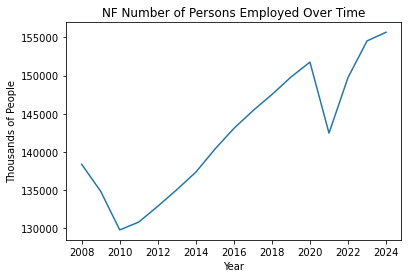

In [71]:
#lineplot to chart employment data progression over time
E_ax = sns.lineplot(data=EmploymentYearlydf)
E_ax.set(xlabel='Year',ylabel='Thousands of People',title='NF Number of Persons Employed Over Time')

#Remove legend
plt.legend([],[], frameon=False)

plt.show()

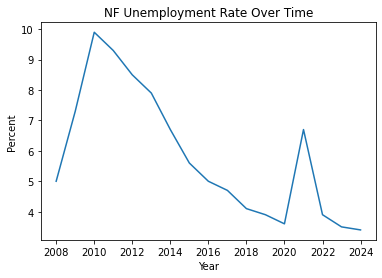

In [72]:
#lineplot to chart unemployment data progression over time
U_ax = sns.lineplot(data=UnemploymentYearlydf)
U_ax.set(xlabel='Year',ylabel='Percent',title='NF Unemployment Rate Over Time')

#Remove legend
plt.legend([],[], frameon=False)

plt.show()

In [73]:
#convert employment plot to bokeh
source = ColumnDataSource(Employmentdf)

employmentLineChart = figure(title='NF Number of Persons Employed Over Time',
                             x_axis_label='Year',
                             x_axis_type='datetime',
                             y_axis_label='Thousands of People')
employmentLineChart.line(x='observation_date', y='PAYEMS', source=source, line_width=2, color='blue')
employmentLineChart.add_layout(Title(text="Chart displays the amount of people employed at any given time across last 15 years", align="center"), "below")

In [74]:
#convert unemployment plot to bokeh
source = ColumnDataSource(Unemploymentdf)

UnemploymentLineChart = figure(title='NF Unemployment Rate Over Time',
                             x_axis_label='Year',
                             x_axis_type='datetime',
                             y_axis_label='Percent')
UnemploymentLineChart.line(x='observation_date', y='UNRATE', source=source, line_width=2, color='red')
UnemploymentLineChart.add_layout(Title(text="Chart displays the unemployment rate at any given time across last 15 years", align="center"), "below")

In [75]:
#add hover effects to employment chart

Ehover = HoverTool()
Ehover.tooltips=[
    ('Date', '@observation_date{%F}'),
    ('Number of People', '@PAYEMS')
]
Ehover.formatters={'@observation_date': 'datetime'}

employmentLineChart.add_tools(Ehover)

output_notebook()
show(employmentLineChart)

Loading BokehJS ...

In [76]:
#add hover effects to unemployment chart

Uhover = HoverTool()
Uhover.tooltips=[
    ('Date', '@observation_date{%F}'),
    ('Unemployment Rate', '@UNRATE'+'%'),
]
Uhover.formatters={'@observation_date': 'datetime'}

UnemploymentLineChart.add_tools(Uhover)

output_notebook()
show(UnemploymentLineChart)

Loading BokehJS ...